In [1]:
from tensorflow.keras.layers import Input, Lambda, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
### Re-sizing the image
IMAGE_SIZE = [224, 224]
train_path = "/content/drive/My Drive/Lung_Disease/lung_disease/train"
test_path = "/content/drive/My Drive/Lung_Disease/lung_disease/test"

In [5]:
vgg = VGG19(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

80142336/80134624 [==============================] - 0s 0us/step


In [6]:
### Don't train the existing the weights
for layer in vgg.layers:
  layer.trainable = False

In [7]:
### Here getting number of output classes
folders = glob("/content/drive/My Drive/Lung_Disease/lung_disease/train/*")
folders

['/content/drive/My Drive/Lung_Disease/lung_disease/train/NORMAL',
 '/content/drive/My Drive/Lung_Disease/lung_disease/train/PNEUMONIA']

In [8]:
x = Flatten()(vgg.output)

In [9]:
prediction = Dense(len(folders), activation = 'softmax')(x)

In [10]:
### create the model object

model = Model(inputs = vgg.input, outputs = prediction)

In [11]:
### Now we view the structure of the model

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
#Now we compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [14]:
test_datagen = ImageDataGenerator(rescale = 1./ 255)

In [15]:
## here we provide same target size as initialised for images

train_set = train_datagen.flow_from_directory(train_path, target_size = (224, 224), batch_size = 32, class_mode = 'categorical')


Found 5216 images belonging to 2 classes.


In [16]:
test_set = test_datagen.flow_from_directory(test_path, target_size = (224, 224), batch_size = 32, class_mode = 'categorical')

Found 625 images belonging to 2 classes.


In [17]:
#now we train the model
result = model.fit_generator(train_set, validation_data = test_set, epochs = 10, steps_per_epoch = len(train_set), validation_steps = len(test_set))

Epoch 1/10
163/163 [==============================] - 3189s 20s/step - loss: 0.6458 - accuracy: 0.8186 - val_loss: 0.3674 - val_accuracy: 0.8528
Epoch 2/10
163/163 [==============================] - 111s 680ms/step - loss: 0.1366 - accuracy: 0.9461 - val_loss: 0.3098 - val_accuracy: 0.8848
Epoch 3/10
163/163 [==============================] - 111s 679ms/step - loss: 0.1098 - accuracy: 0.9564 - val_loss: 0.3032 - val_accuracy: 0.9072
Epoch 4/10
163/163 [==============================] - 111s 681ms/step - loss: 0.1016 - accuracy: 0.9603 - val_loss: 0.2794 - val_accuracy: 0.9040
Epoch 5/10
163/163 [==============================] - 111s 680ms/step - loss: 0.1058 - accuracy: 0.9595 - val_loss: 0.4287 - val_accuracy: 0.8848
Epoch 6/10
163/163 [==============================] - 111s 680ms/step - loss: 0.0949 - accuracy: 0.9654 - val_loss: 0.3823 - val_accuracy: 0.8992
Epoch 7/10
163/163 [==============================] - 111s 684ms/step - loss: 0.1033 - accuracy: 0.9590 - val_loss: 0.3427 - 

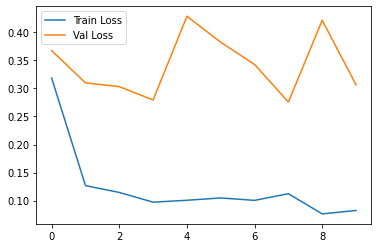

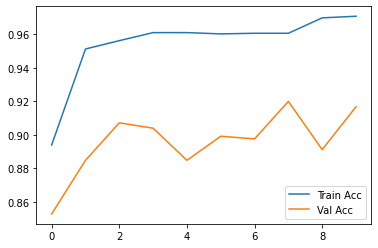

In [18]:
plt.plot(result.history['loss'], label = 'Train Loss')
plt.plot(result.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.show()

plt.plot(result.history['accuracy'], label = 'Train Acc')
plt.plot(result.history['val_accuracy'], label = 'Val Acc')
plt.legend()
plt.show()

In [21]:
from tensorflow.keras.models import load_model
model.save("pneumonia_model_vgg19.h5")

In [22]:
## Now we load model for prediction of dataset
 
model_img = load_model("pneumonia_model_vgg19.h5")

In [23]:
img = image.load_img("/content/drive/My Drive/Lung_Disease/lung_disease/test/PNEUMONIA/person100_bacteria_478.jpeg", target_size = (224, 224))

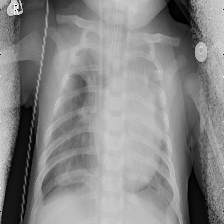

In [24]:
img

In [25]:
x = image.img_to_array(img)

In [26]:
x

array([[[184., 184., 184.],
        [183., 183., 183.],
        [172., 172., 172.],
        ...,
        [203., 203., 203.],
        [201., 201., 201.],
        [207., 207., 207.]],

       [[174., 174., 174.],
        [180., 180., 180.],
        [185., 185., 185.],
        ...,
        [200., 200., 200.],
        [199., 199., 199.],
        [208., 208., 208.]],

       [[164., 164., 164.],
        [175., 175., 175.],
        [184., 184., 184.],
        ...,
        [202., 202., 202.],
        [207., 207., 207.],
        [201., 201., 201.]],

       ...,

       [[102., 102., 102.],
        [ 44.,  44.,  44.],
        [ 19.,  19.,  19.],
        ...,
        [ 79.,  79.,  79.],
        [108., 108., 108.],
        [124., 124., 124.]],

       [[ 96.,  96.,  96.],
        [ 18.,  18.,  18.],
        [ 20.,  20.,  20.],
        ...,
        [ 94.,  94.,  94.],
        [ 84.,  84.,  84.],
        [132., 132., 132.]],

       [[106., 106., 106.],
        [ 36.,  36.,  36.],
        [ 19.,  

In [27]:
x = np.expand_dims(x, axis = 0)

In [28]:
x

array([[[[184., 184., 184.],
         [183., 183., 183.],
         [172., 172., 172.],
         ...,
         [203., 203., 203.],
         [201., 201., 201.],
         [207., 207., 207.]],

        [[174., 174., 174.],
         [180., 180., 180.],
         [185., 185., 185.],
         ...,
         [200., 200., 200.],
         [199., 199., 199.],
         [208., 208., 208.]],

        [[164., 164., 164.],
         [175., 175., 175.],
         [184., 184., 184.],
         ...,
         [202., 202., 202.],
         [207., 207., 207.],
         [201., 201., 201.]],

        ...,

        [[102., 102., 102.],
         [ 44.,  44.,  44.],
         [ 19.,  19.,  19.],
         ...,
         [ 79.,  79.,  79.],
         [108., 108., 108.],
         [124., 124., 124.]],

        [[ 96.,  96.,  96.],
         [ 18.,  18.,  18.],
         [ 20.,  20.,  20.],
         ...,
         [ 94.,  94.,  94.],
         [ 84.,  84.,  84.],
         [132., 132., 132.]],

        [[106., 106., 106.],
       

In [29]:
img_data = preprocess_input(x)

In [30]:
img_data

array([[[[  80.061    ,   67.221    ,   60.32     ],
         [  79.061    ,   66.221    ,   59.32     ],
         [  68.061    ,   55.221    ,   48.32     ],
         ...,
         [  99.061    ,   86.221    ,   79.32     ],
         [  97.061    ,   84.221    ,   77.32     ],
         [ 103.061    ,   90.221    ,   83.32     ]],

        [[  70.061    ,   57.221    ,   50.32     ],
         [  76.061    ,   63.221    ,   56.32     ],
         [  81.061    ,   68.221    ,   61.32     ],
         ...,
         [  96.061    ,   83.221    ,   76.32     ],
         [  95.061    ,   82.221    ,   75.32     ],
         [ 104.061    ,   91.221    ,   84.32     ]],

        [[  60.060997 ,   47.221    ,   40.32     ],
         [  71.061    ,   58.221    ,   51.32     ],
         [  80.061    ,   67.221    ,   60.32     ],
         ...,
         [  98.061    ,   85.221    ,   78.32     ],
         [ 103.061    ,   90.221    ,   83.32     ],
         [  97.061    ,   84.221    ,   77.32     ]],

In [31]:
classes = model.predict(img_data)

In [32]:
#In folder, first folder is Normal ie 0 and second folder is pneumonia ie 1 , this is how specify image.
classes

array([[0., 1.]], dtype=float32)

In [33]:
a = np.expand_dims(classes, axis = 0)
a.ndim

3

In [35]:
a = np.argmax(classes, axis = 1)

In [37]:
if a == 0:
  print("Great!!!, You don't have pneumonia disease.")
else:
  print("Sorry, You have pneumonia disease,kindly contact your doctor.")

Sorry, You have pneumonia disease,kindly contact your doctor.
